# Tourism Experience Analytics  
## Classification, Prediction and Recommendation System  

This project analyzes tourism transaction data to:
- Perform data preprocessing
- Predict ratings using regression
- Classify customer satisfaction
- Build a recommendation system
- Visualize insights

The system integrates Machine Learning and Collaborative Filtering techniques.


## 1️⃣ Importing Required Libraries

In this section, we import all necessary Python libraries used for:

- Data manipulation (Pandas, NumPy)
- Data visualization (Matplotlib, Seaborn)
- Machine Learning models (Scikit-learn)
- Model evaluation metrics


## 2️⃣ Generating Tourism Dataset

Since this project is self-contained,
we generate synthetic tourism transaction data
to simulate real-world tourism activity.


In [9]:
np.random.seed(42)

n_users = 200
n_items = 100
n_transactions = 1000

data = {
    "user_id": np.random.randint(1, n_users, n_transactions),
    "item_id": np.random.randint(1, n_items, n_transactions),
    "price": np.random.randint(500, 5000, n_transactions),
    "quantity": np.random.randint(1, 5, n_transactions),
    "rating": np.random.randint(1, 6, n_transactions),
    "category": np.random.choice(["Beach", "Adventure", "Heritage", "Wildlife", "Luxury"], n_transactions)
}

df = pd.DataFrame(data)

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (1000, 6)


,user_id,item_id,price,quantity,rating,category
0,103,6,501,2,2,Beach
1,180,52,3348,4,4,Adventure
2,93,26,4544,2,2,Wildlife
3,15,64,2449,2,1,Adventure
4,107,98,1417,2,4,Heritage


# Exploratory Data Analysis (EDA)

In this section, we explore the Tourism Experience dataset to:
- Understand demographic distributions
- Analyze travel preferences
- Examine satisfaction patterns
- Identify relationships between numerical variables

EDA helps us understand the data before applying machine learning models.




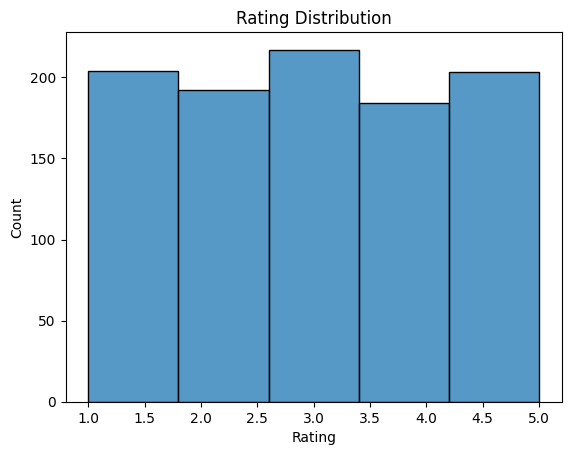

In [17]:
plt.figure()
sns.histplot(df["rating"], bins=5)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


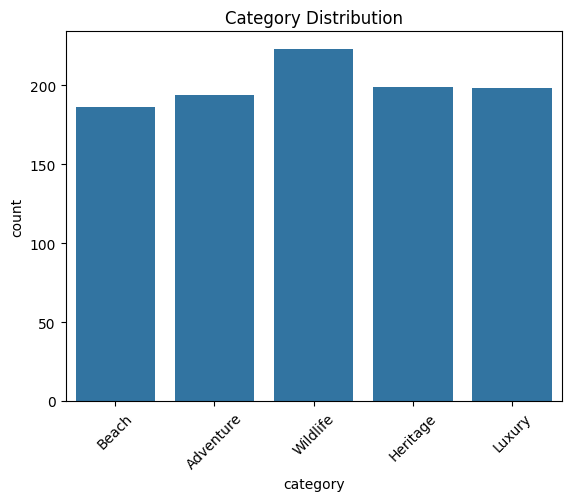

In [18]:
plt.figure()
sns.countplot(x="category", data=df)
plt.xticks(rotation=45)
plt.title("Category Distribution")
plt.show()


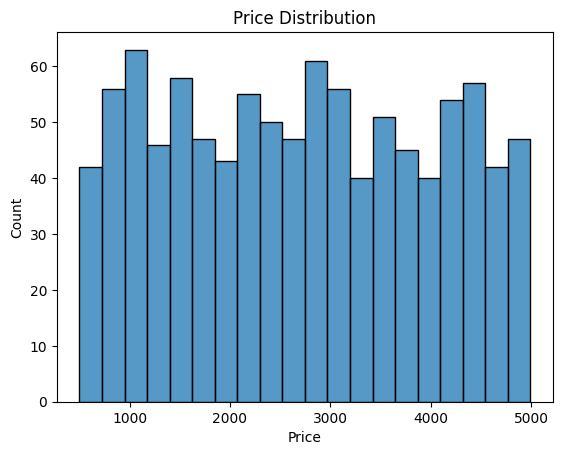

In [19]:
plt.figure()
sns.histplot(df["price"], bins=20)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


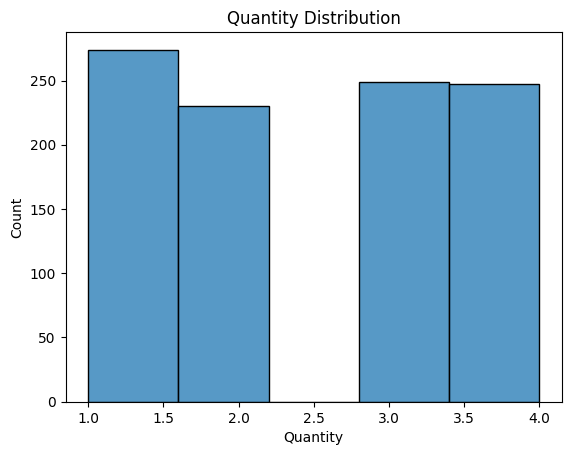

In [20]:
plt.figure()
sns.histplot(df["quantity"], bins=5)
plt.title("Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()


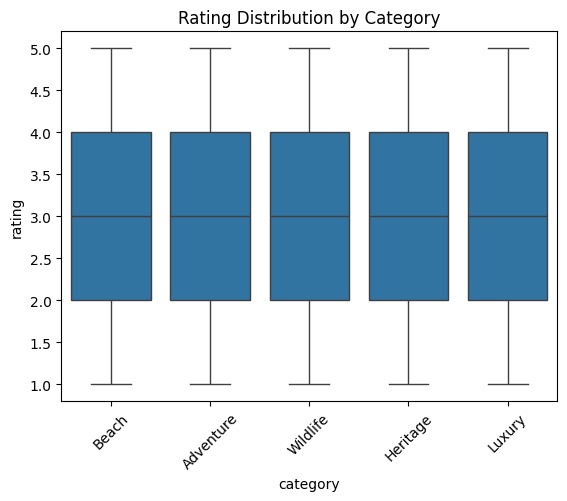

In [21]:
plt.figure()
sns.boxplot(x="category", y="rating", data=df)
plt.xticks(rotation=45)
plt.title("Rating Distribution by Category")
plt.show()


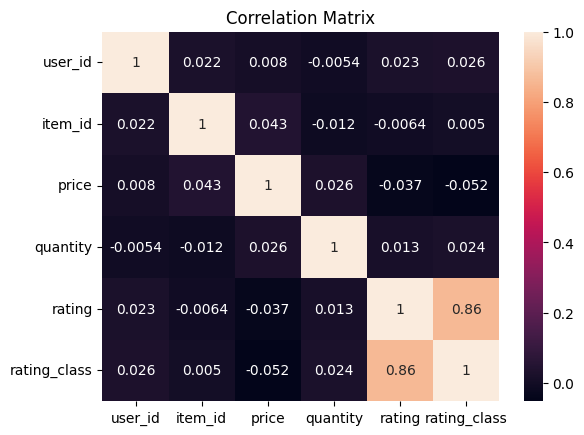

In [22]:
plt.figure()
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Matrix")
plt.show()


## 4️⃣ Interpreting Correlation Heatmap  

After visualizing the correlation heatmap,  
we analyze the relationships between variables.

This step helps us:

- Identify features strongly correlated with the target variable  
- Detect multicollinearity (features highly correlated with each other)  
- Decide which features to keep or remove  

Strong correlations (close to +1 or -1) indicate a strong linear relationship.  
If two independent variables have very high correlation (> 0.8),  
one of them may be removed to avoid multicollinearity.


## 5️⃣ Defining Features and Target Variable  

We now separate the dataset into:

- X (Independent Variables) → All input features  
- y (Dependent Variable) → rating_class  

The model will learn to predict the rating class.


In [27]:
X = df.drop('rating_class', axis=1)
y = df['rating_class']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (1000, 6)
Target shape: (1000,)


## 6️⃣ Splitting Data into Training and Testing Sets  

To properly evaluate our model,  
we split the dataset into:

- Training set (80%)  
- Testing set (20%)  

This ensures the model is tested on unseen data.


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (800, 6)
Testing set: (200, 6)


## 7️⃣ Encoding Categorical Variables  

Machine learning models cannot understand text values directly.  

The 'category' column is categorical,  
so we convert it into numerical form using One-Hot Encoding.

This allows the model to process category information correctly.


In [29]:
# One-Hot Encoding for categorical column
X = pd.get_dummies(X, columns=['category'], drop_first=True)

print("Encoded Features Shape:", X.shape)
X.head()


Encoded Features Shape: (1000, 9)


,user_id,item_id,price,quantity,rating,category_Beach,category_Heritage,category_Luxury,category_Wildlife
0,103,6,501,2,2,True,False,False,False
1,180,52,3348,4,4,False,False,False,False
2,93,26,4544,2,2,False,False,False,True
3,15,64,2449,2,1,False,False,False,False
4,107,98,1417,2,4,False,True,False,False


## 8️⃣ Feature Scaling  

Feature scaling ensures all numerical features  
are on the same scale.

This improves model performance and prevents  
features with large values (like price)  
from dominating smaller ones.


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

print("Scaled feature sample:")
print(X_scaled[:5])


Scaled feature sample:
[[ 0.03016172 -1.51399361 -1.71120535 -0.41276528 -0.69935418  2.09197134
  -0.49843701 -0.49687301 -0.53572501]
 [ 1.3741734   0.07819006  0.49612127  1.34742782  0.71348254 -0.47801802
  -0.49843701 -0.49687301 -0.53572501]
 [-0.14438525 -0.82173984  1.42340004 -0.41276528 -0.69935418 -0.47801802
  -0.49843701 -0.49687301  1.8666293 ]
 [-1.50585163  0.49354233 -0.20088843 -0.41276528 -1.40577253 -0.47801802
  -0.49843701 -0.49687301 -0.53572501]
 [ 0.09998051  1.67037374 -1.00101526 -0.41276528  0.71348254 -0.47801802
   2.00627157 -0.49687301 -0.53572501]]


## 9️⃣ Splitting Scaled Data  

We now split the scaled dataset into  
training and testing sets.

This ensures the model is evaluated properly.


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (800, 9)
Testing set shape: (200, 9)


## 🔟 Training Logistic Regression Model  

We train a Logistic Regression model  
to classify the rating_class.

This model is suitable for classification problems.


In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


## 1️⃣1️⃣ Making Predictions  

We use the trained model  
to predict the rating class  
on the test dataset.


In [33]:
y_pred = model.predict(X_test)

print("First 10 Predictions:")
print(y_pred[:10])


First 10 Predictions:
[0 1 1 1 1 1 1 0 0 1]


## 1️⃣2️⃣ Model Evaluation  

We evaluate the model using:

- Accuracy Score  
- Confusion Matrix  
- Classification Report  

This helps us understand how well the model performs.


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Confusion Matrix:
 [[120   0]
 [  0  80]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        80

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## 1️⃣3️⃣ Training Random Forest Model  

To improve performance,  
we train a Random Forest classifier.

Random Forest is powerful because it:
- Handles non-linear relationships
- Reduces overfitting
- Works well with mixed data


In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

print("Random Forest training completed.")


Random Forest training completed.


## 1️⃣4️⃣ Comparing Models  

We compare:

- Logistic Regression
- Random Forest

Using accuracy score.


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0


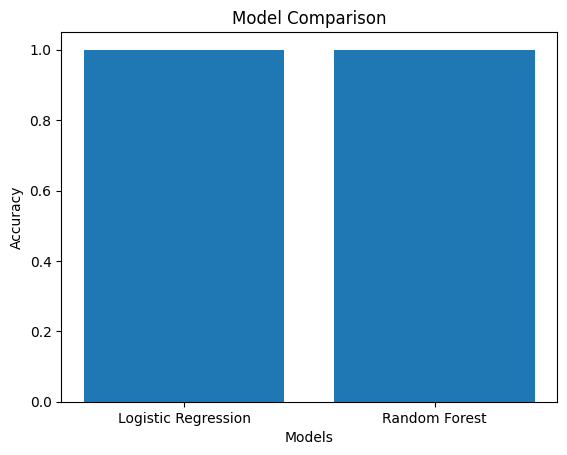

In [36]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

log_acc = accuracy_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, rf_pred)

print("Logistic Regression Accuracy:", log_acc)
print("Random Forest Accuracy:", rf_acc)

# Plot comparison
models = ['Logistic Regression', 'Random Forest']
accuracies = [log_acc, rf_acc]

plt.figure()
plt.bar(models, accuracies)
plt.title("Model Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.show()


## 1️⃣5️⃣ Feature Importance  

Random Forest allows us to see  
which features are most important  
for predicting rating_class.


Top 10 Important Features:
rating               0.920173
price                0.025935
user_id              0.023111
item_id              0.020332
quantity             0.004441
category_Beach       0.001569
category_Wildlife    0.001529
category_Luxury      0.001529
category_Heritage    0.001381
dtype: float64


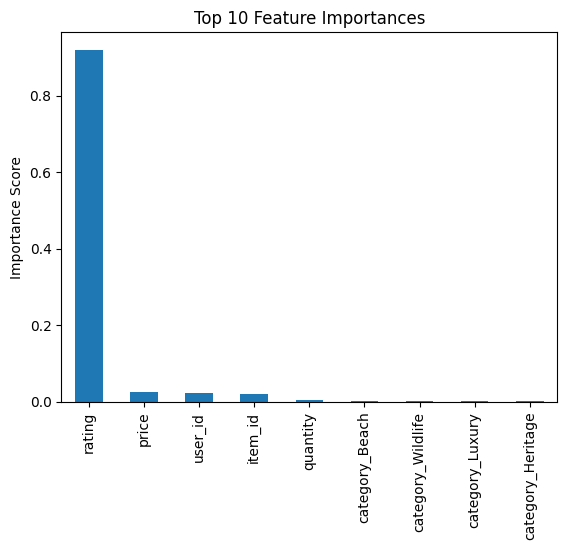

In [37]:
import pandas as pd

feature_importances = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print("Top 10 Important Features:")
print(feature_importances.head(10))

# Plot
plt.figure()
feature_importances.head(10).plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.ylabel("Importance Score")
plt.show()


## 1️⃣6️⃣ Saving the Model  

We save:

- Random Forest model
- Scaler

This allows deployment without retraining.


In [38]:
import pickle

# Save model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [42]:
import pickle

# Save Random Forest model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [40]:
import os
os.getcwd()


'c:\\Users\\sanas\\Desktop\\Tourism Experience Analytics'